In [12]:
import numpy as np # linear algebra
import pandas as pd # data processing
import time
from sklearn.model_selection import cross_val_score

## Read Data

In [13]:
data_name = "dummy"
# data_name = "dummy_object"
df = pd.read_csv(f"../datasets/data_{data_name}.csv")
df_copy = df.copy()
df_copy.head()

,Inflight wifi service_0,Inflight wifi service_1,Inflight wifi service_2,Inflight wifi service_3,Inflight wifi service_4,Inflight wifi service_5,Departure/Arrival time convenient_0,Departure/Arrival time convenient_1,Departure/Arrival time convenient_2,Departure/Arrival time convenient_3,...,Type of Travel_Business travel,Type of Travel_Personal Travel,Class_Business,Class_Eco,Class_Eco Plus,Age,Flight Distance,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,0,0,1,0,0,0,0,0,0,...,0,1,0,0,1,13,460,25,18.0,neutral or dissatisfied
1,0,0,0,1,0,0,0,0,1,0,...,1,0,1,0,0,25,235,1,6.0,neutral or dissatisfied
2,0,0,1,0,0,0,0,0,1,0,...,1,0,1,0,0,26,1142,0,0.0,satisfied
3,0,0,1,0,0,0,0,0,0,0,...,1,0,1,0,0,25,562,11,9.0,neutral or dissatisfied
4,0,0,0,1,0,0,0,0,0,1,...,1,0,1,0,0,61,214,0,0.0,satisfied


## Train-Test Splitting

In [14]:
X= df_copy.iloc[:,:-1]
X

,Inflight wifi service_0,Inflight wifi service_1,Inflight wifi service_2,Inflight wifi service_3,Inflight wifi service_4,Inflight wifi service_5,Departure/Arrival time convenient_0,Departure/Arrival time convenient_1,Departure/Arrival time convenient_2,Departure/Arrival time convenient_3,...,Customer Type_disloyal Customer,Type of Travel_Business travel,Type of Travel_Personal Travel,Class_Business,Class_Eco,Class_Eco Plus,Age,Flight Distance,Departure Delay in Minutes,Arrival Delay in Minutes
0,0,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,1,13,460,25,18.0
1,0,0,0,1,0,0,0,0,1,0,...,1,1,0,1,0,0,25,235,1,6.0
2,0,0,1,0,0,0,0,0,1,0,...,0,1,0,1,0,0,26,1142,0,0.0
3,0,0,1,0,0,0,0,0,0,0,...,0,1,0,1,0,0,25,562,11,9.0
4,0,0,0,1,0,0,0,0,0,1,...,0,1,0,1,0,0,61,214,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129482,0,0,0,1,0,0,0,0,0,1,...,1,1,0,1,0,0,34,526,0,0.0
129483,0,0,0,0,1,0,0,0,0,0,...,0,1,0,1,0,0,23,646,0,0.0
129484,0,0,1,0,0,0,0,0,0,0,...,0,0,1,0,1,0,17,828,0,0.0
129485,0,0,0,1,0,0,0,0,0,1,...,0,1,0,1,0,0,14,1127,0,0.0


In [15]:
y = df_copy.iloc[:,-1]
y

0         neutral or dissatisfied
1         neutral or dissatisfied
2                       satisfied
3         neutral or dissatisfied
4                       satisfied
                   ...           
129482    neutral or dissatisfied
129483                  satisfied
129484    neutral or dissatisfied
129485                  satisfied
129486    neutral or dissatisfied
Name: satisfaction, Length: 129487, dtype: object

In [16]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)
print(f"Shape of training set is : {X_train.shape} and test set is :{X_test.shape}" )

Shape of training set is : (90640, 96) and test set is :(38847, 96)


In [17]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

X_train

array([[-0.17632264, -0.45437674,  1.7418388 , ...,  1.89256284,
         1.04110417,  0.98439561],
       [-0.17632264, -0.45437674, -0.57410594, ..., -0.66088167,
        -0.39052142, -0.29022307],
       [-0.17632264,  2.20081686, -0.57410594, ...,  0.65289057,
         0.71696252,  0.77195916],
       ...,
       [-0.17632264, -0.45437674, -0.57410594, ..., -0.17923194,
         0.28477367, -0.05123207],
       [-0.17632264, -0.45437674, -0.57410594, ..., -0.73498162,
        -0.39052142, -0.3964413 ],
       [ 5.67142135, -0.45437674, -0.57410594, ..., -0.94025854,
        -0.39052142, -0.3964413 ]])

## Set paramiter CV

In [18]:
# ทำ Cross Validation
k_folds = 15  # จำนวน k-folds 

## Logistic Regression

In [19]:
from sklearn.linear_model import LogisticRegression

# create logistic regression model and fit to training data
model_lr = LogisticRegression()

start_time = time.time()  # เวลาเริ่มต้น
model_lr.fit(X_train, y_train)
end_time = time.time()  # เวลาสิ้นสุด

# คำนวณเวลาที่ใช้ในการฝึกโมเดล
training_time_LR = end_time - start_time
print(f"เวลาที่ใช้ในการฝึกโมเดล: {training_time_LR:.6f} วินาที")

เวลาที่ใช้ในการฝึกโมเดล: 0.400123 วินาที


In [20]:
from sklearn.metrics import classification_report,ConfusionMatrixDisplay,confusion_matrix
from sklearn.metrics import accuracy_score

y_pred_lr=model_lr.predict(X_test)
accuracy_LR=accuracy_score(y_pred_lr,y_test)
print(f"Accuracy of Logistic Regression is : {round(accuracy_LR*100,2)} % .")

report=classification_report(y_test,y_pred_lr)
print("Classification Report is : \n",report)

Accuracy of Logistic Regression is : 93.3 % .
Classification Report is : 
                          precision    recall  f1-score   support

neutral or dissatisfied       0.94      0.95      0.94     22029
              satisfied       0.93      0.92      0.92     16818

               accuracy                           0.93     38847
              macro avg       0.93      0.93      0.93     38847
           weighted avg       0.93      0.93      0.93     38847



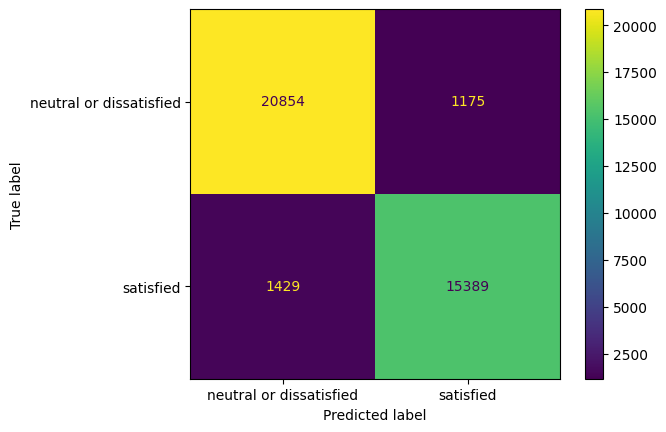

In [21]:
cm_1= confusion_matrix(y_test, y_pred_lr, labels=model_lr.classes_)
disp_1= ConfusionMatrixDisplay(confusion_matrix=cm_1,
                          display_labels=model_lr.classes_)
disp_1.plot()

In [22]:
start_time_cv = time.time()  # เวลาเริ่มต้นสำหรับ cross-validation
cv_scores_lr = cross_val_score(model_lr, X_train, y_train, cv=k_folds, scoring='accuracy')
end_time_cv = time.time()  # เวลาสิ้นสุดสำหรับ cross-validation

# แสดงผล Cross Validation Scores
print(f"Cross Validation Scores (Logistic Regression): {cv_scores_lr}")
print(f"Mean CV Accuracy: {np.mean(cv_scores_lr):.4f}")
print(f"Standard Deviation CV Accuracy: {np.std(cv_scores_lr):.4f}")

# คำนวณเวลาที่ใช้ในการทำ Cross Validation
cv_time_LR = end_time_cv - start_time_cv
print(f"เวลาที่ใช้ในการทำ Cross Validation: {cv_time_LR:.6f} วินาที")

Cross Validation Scores (Logistic Regression): [0.93579348 0.93397319 0.93281483 0.93331127 0.93446963 0.9313255
 0.92933973 0.9348006  0.93513156 0.93182194 0.93694141 0.93379676
 0.93594836 0.93131413 0.93760344]
Mean CV Accuracy: 0.9339
Standard Deviation CV Accuracy: 0.0022
เวลาที่ใช้ในการทำ Cross Validation: 4.885711 วินาที


In [23]:
# การประเมินผล
train_accuracy = accuracy_score(y_train, model_lr.predict(X_train))
test_accuracy = accuracy_score(y_test, model_lr.predict(X_test))

print(f'Training Accuracy: {train_accuracy}')
print(f'Test Accuracy: {test_accuracy}')

Training Accuracy: 0.9342674315975287
Test Accuracy: 0.9329677967410611


## K-NN(K Nearest Neighbours)

In [24]:
from sklearn.neighbors import KNeighborsClassifier

model_knn=KNeighborsClassifier(n_neighbors=5)

#fit the model with trained data
start_time = time.time()  # เวลาเริ่มต้น
model_knn.fit(X_train,y_train)
end_time = time.time()  # เวลาสิ้นสุด

# คำนวณเวลาที่ใช้ในการฝึกโมเดล
training_time_KNN = end_time - start_time
print(f"เวลาที่ใช้ในการฝึกโมเดล: {training_time_KNN:.6f} วินาที")


เวลาที่ใช้ในการฝึกโมเดล: 0.088249 วินาที


In [25]:

#Predict the accuracy of the model
y_pred_knn=model_knn.predict(X_test)

accuracy_KNN=accuracy_score(y_pred_knn,y_test)
print(f"Accuracy of Knn is : {round(accuracy_KNN*100,2)} % .")

report=classification_report(y_test,y_pred_knn)
print("Classification Report is : \n",report)

Accuracy of Knn is : 94.2 % .
Classification Report is : 
                          precision    recall  f1-score   support

neutral or dissatisfied       0.94      0.96      0.95     22029
              satisfied       0.94      0.92      0.93     16818

               accuracy                           0.94     38847
              macro avg       0.94      0.94      0.94     38847
           weighted avg       0.94      0.94      0.94     38847



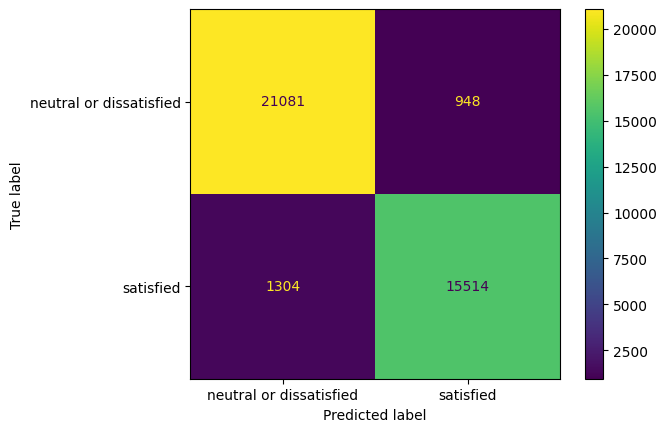

In [26]:
cm_2= confusion_matrix(y_test, y_pred_knn, labels=model_lr.classes_)
disp_2= ConfusionMatrixDisplay(confusion_matrix=cm_2,
                          display_labels=model_knn.classes_)
disp_2.plot()

In [27]:
# ทำ Cross Validation
start_time_cv = time.time()  # เวลาเริ่มต้นสำหรับ cross-validation
cv_scores_knn = cross_val_score(model_knn, X_train, y_train, cv=k_folds, scoring='accuracy')
end_time_cv = time.time()  # เวลาสิ้นสุดสำหรับ cross-validation

# แสดงผล Cross Validation Scores
print(f"Cross Validation Scores (KNN): {cv_scores_knn}")
print(f"Mean CV Accuracy: {np.mean(cv_scores_knn):.4f}")
print(f"Standard Deviation CV Accuracy: {np.std(cv_scores_knn):.4f}")

# คำนวณเวลาที่ใช้ในการทำ Cross Validation
cv_time_KNN = end_time_cv - start_time_cv
print(f"เวลาที่ใช้ในการทำ Cross Validation: {cv_time_KNN:.6f} วินาที")


Cross Validation Scores (KNN): [0.94092338 0.94241271 0.94290915 0.94191627 0.94605328 0.94208175
 0.93943406 0.94108886 0.94489492 0.94141982 0.94571334 0.94472029
 0.94654088 0.94157564 0.94935452]
Mean CV Accuracy: 0.9434
Standard Deviation CV Accuracy: 0.0026
เวลาที่ใช้ในการทำ Cross Validation: 12.854909 วินาที


In [28]:
# การประเมินผล
train_accuracy = accuracy_score(y_train, model_knn.predict(X_train))
test_accuracy = accuracy_score(y_test, model_knn.predict(X_test))

print(f'Training Accuracy: {train_accuracy}')
print(f'Test Accuracy: {test_accuracy}')

Training Accuracy: 0.9597859664607238
Test Accuracy: 0.9420289855072463


## Naive-Bayes

In [29]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import MinMaxScaler

# ใช้ MinMaxScaler แปลง X_train ให้อยู่ในช่วง 0 ถึง 1
scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ฟิตโมเดลด้วยข้อมูลที่ถูกแปลงแล้ว
model_naive = MultinomialNB()

start_time = time.time()  # เวลาเริ่มต้น
model_naive.fit(X_train_scaled, y_train)
end_time = time.time()  # เวลาสิ้นสุด

# คำนวณเวลาที่ใช้ในการฝึกโมเดล
training_time_NB = end_time - start_time
print(f"เวลาที่ใช้ในการฝึกโมเดล: {training_time_NB:.6f} วินาที")


เวลาที่ใช้ในการฝึกโมเดล: 0.214140 วินาที


In [30]:

#Predict the accuracy of the model
y_pred_naive=model_naive.predict(X_test_scaled)

accuracy_NB=accuracy_score(y_pred_naive,y_test)
print(f"Accuracy of Naive Bayes is : {round(accuracy_NB*100,2)} % .")

report=classification_report(y_test,y_pred_naive)
print("Classification Report is : \n",report)

Accuracy of Naive Bayes is : 88.51 % .
Classification Report is : 
                          precision    recall  f1-score   support

neutral or dissatisfied       0.90      0.89      0.90     22029
              satisfied       0.86      0.87      0.87     16818

               accuracy                           0.89     38847
              macro avg       0.88      0.88      0.88     38847
           weighted avg       0.89      0.89      0.89     38847



In [31]:
start_time_cv = time.time()  # เวลาเริ่มต้นสำหรับ cross-validation
cv_scores_nb = cross_val_score(model_naive, X_train_scaled, y_train, cv=k_folds, scoring='accuracy')
end_time_cv = time.time()  # เวลาสิ้นสุดสำหรับ cross-validation

# แสดงผล Cross Validation Scores
print(f"Cross Validation Scores (Naive Bayes): {cv_scores_nb}")
print(f"Mean CV Accuracy: {np.mean(cv_scores_nb):.4f}")
print(f"Standard Deviation CV Accuracy: {np.std(cv_scores_nb):.4f}")

# คำนวณเวลาที่ใช้ในการทำ Cross Validation
cv_time_NB = end_time_cv - start_time_cv
print(f"เวลาที่ใช้ในการทำ Cross Validation: {cv_time_NB:.6f} วินาที")

Cross Validation Scores (Naive Bayes): [0.88730763 0.89045176 0.89045176 0.88366705 0.8987258  0.88565282
 0.88052292 0.88217773 0.8901208  0.88681119 0.88613042 0.88546839
 0.89490235 0.88894406 0.89126117]
Mean CV Accuracy: 0.8882
Standard Deviation CV Accuracy: 0.0046
เวลาที่ใช้ในการทำ Cross Validation: 2.958862 วินาที


## Decision Tree

In [32]:
from sklearn.tree import DecisionTreeClassifier

model_dt=DecisionTreeClassifier(criterion='gini', splitter='best',max_features=6,random_state=1234)

#fit the model with trained data
start_time = time.time()  # เวลาเริ่มต้น
model_dt.fit(X_train,y_train)
end_time = time.time()  # เวลาสิ้นสุด

# คำนวณเวลาที่ใช้ในการฝึกโมเดล
training_time_DT = end_time - start_time
print(f"เวลาที่ใช้ในการฝึกโมเดล: {training_time_DT:.6f} วินาที")



เวลาที่ใช้ในการฝึกโมเดล: 0.147104 วินาที


In [33]:

#Predict the accuracy of the model
y_pred_dt=model_dt.predict(X_test)

accuracy_DT=accuracy_score(y_pred_dt,y_test)
print(f"Accuracy of Decision Tree is : {round(accuracy_DT*100,2)} % .")

report=classification_report(y_test,y_pred_dt)
print("Classification Report is : \n",report)

Accuracy of Decision Tree is : 91.59 % .
Classification Report is : 
                          precision    recall  f1-score   support

neutral or dissatisfied       0.93      0.92      0.93     22029
              satisfied       0.90      0.91      0.90     16818

               accuracy                           0.92     38847
              macro avg       0.91      0.91      0.91     38847
           weighted avg       0.92      0.92      0.92     38847



In [34]:
start_time_cv = time.time()  # เวลาเริ่มต้นสำหรับ cross-validation
cv_scores_dt = cross_val_score(model_dt, X_train, y_train, cv=k_folds, scoring='accuracy')
end_time_cv = time.time()  # เวลาสิ้นสุดสำหรับ cross-validation

# แสดงผล Cross Validation Scores
print(f"Cross Validation Scores (Decision Tree): {cv_scores_dt}")
print(f"Mean CV Accuracy: {np.mean(cv_scores_dt):.4f}")
print(f"Standard Deviation CV Accuracy: {np.std(cv_scores_dt):.4f}")

# คำนวณเวลาที่ใช้ในการทำ Cross Validation
cv_time_DT = end_time_cv - start_time_cv
print(f"เวลาที่ใช้ในการทำ Cross Validation: {cv_time_DT:.6f} วินาที")

Cross Validation Scores (Decision Tree): [0.91494291 0.92652656 0.92056925 0.91891445 0.91560483 0.92222406
 0.91775608 0.92255502 0.92205858 0.91775608 0.91774247 0.9245283
 0.92121814 0.91377027 0.9203906 ]
Mean CV Accuracy: 0.9198
Standard Deviation CV Accuracy: 0.0035
เวลาที่ใช้ในการทำ Cross Validation: 2.394165 วินาที


In [35]:
# การประเมินผล
train_accuracy = accuracy_score(y_train, model_dt.predict(X_train))
test_accuracy = accuracy_score(y_test, model_dt.predict(X_test))

print(f'Training Accuracy: {train_accuracy}')
print(f'Test Accuracy: {test_accuracy}')

Training Accuracy: 1.0
Test Accuracy: 0.9159265837773831


## สรูป

In [36]:
print("-"*30,"สรูป","-"*30)

print("-"*65)
print(f"Accuracy of Logistic Regression is : {round(accuracy_LR*100,2)} % .")
print(f"เวลาที่ใช้ในการฝึกโมเดล: {training_time_LR:.6f} วินาที")
# print(f"Cross Validation Scores (Logistic Regression): {cv_scores_lr}")
print(f"Mean CV Accuracy: {np.mean(cv_scores_lr):.4f}")
print(f"Standard Deviation CV Accuracy: {np.std(cv_scores_lr):.4f}")

print("-"*65)
print(f"Accuracy of Knn is : {round(accuracy_KNN*100,2)} % .")
print(f"เวลาที่ใช้ในการฝึกโมเดล: {training_time_KNN:.6f} วินาที")
# print(f"Cross Validation Scores (KNN): {cv_scores_knn}")
print(f"Mean CV Accuracy: {np.mean(cv_scores_knn):.4f}")
print(f"Standard Deviation CV Accuracy: {np.std(cv_scores_knn):.4f}")

print("-"*65)
print(f"Accuracy of Naive Bayes is : {round(accuracy_NB*100,2)} % .")
print(f"เวลาที่ใช้ในการฝึกโมเดล: {training_time_NB:.6f} วินาที")
# print(f"Cross Validation Scores (Naive Bayes): {cv_scores_nb}")
print(f"Mean CV Accuracy: {np.mean(cv_scores_nb):.4f}")
print(f"Standard Deviation CV Accuracy: {np.std(cv_scores_nb):.4f}")

print("-"*65)
print(f"Accuracy of Decision Tree is : {round(accuracy_DT*100,2)} % .")
print(f"เวลาที่ใช้ในการฝึกโมเดล: {training_time_DT:.6f} วินาที")
# print(f"Cross Validation Scores (Decision Tree): {cv_scores_dt}")
print(f"Mean CV Accuracy: {np.mean(cv_scores_dt):.4f}")
print(f"Standard Deviation CV Accuracy: {np.std(cv_scores_dt):.4f}")


------------------------------ สรูป ------------------------------
-----------------------------------------------------------------
Accuracy of Logistic Regression is : 93.3 % .
เวลาที่ใช้ในการฝึกโมเดล: 0.400123 วินาที
Mean CV Accuracy: 0.9339
Standard Deviation CV Accuracy: 0.0022
-----------------------------------------------------------------
Accuracy of Knn is : 94.2 % .
เวลาที่ใช้ในการฝึกโมเดล: 0.088249 วินาที
Mean CV Accuracy: 0.9434
Standard Deviation CV Accuracy: 0.0026
-----------------------------------------------------------------
Accuracy of Naive Bayes is : 88.51 % .
เวลาที่ใช้ในการฝึกโมเดล: 0.214140 วินาที
Mean CV Accuracy: 0.8882
Standard Deviation CV Accuracy: 0.0046
-----------------------------------------------------------------
Accuracy of Decision Tree is : 91.59 % .
เวลาที่ใช้ในการฝึกโมเดล: 0.147104 วินาที
Mean CV Accuracy: 0.9198
Standard Deviation CV Accuracy: 0.0035


In [37]:
name = f"สรุป {data_name}".center(65)  # จัดให้ name อยู่ตรงกลางในความกว้าง 65 ตัวอักษร
line = "-" * 65
# Prepare data as a string
results = """
{}
{}
{}
Accuracy of Logistic Regression is : {:.2f} % .
เวลาที่ใช้ในการฝึกโมเดล: {:.6f} วินาที
Mean CV Accuracy: {:.4f}
Standard Deviation CV Accuracy: {:.4f}
-----------------------------------------------------------------
Accuracy of KNN is : {:.2f} % .
เวลาที่ใช้ในการฝึกโมเดล: {:.6f} วินาที
Mean CV Accuracy: {:.4f}
Standard Deviation CV Accuracy: {:.4f}
-----------------------------------------------------------------
Accuracy of Naive Bayes is : {:.2f} % .
เวลาที่ใช้ในการฝึกโมเดล: {:.6f} วินาที
Mean CV Accuracy: {:.4f}
Standard Deviation CV Accuracy: {:.4f}
-----------------------------------------------------------------
Accuracy of Decision Tree is : {:.2f} % .
เวลาที่ใช้ในการฝึกโมเดล: {:.6f} วินาที
Mean CV Accuracy: {:.4f}
Standard Deviation CV Accuracy: {:.4f}
-----------------------------------------------------------------
""".format(line, name, line,
    round(accuracy_LR*100, 2), training_time_LR, np.mean(cv_scores_lr), np.std(cv_scores_lr),
    round(accuracy_KNN*100, 2), training_time_KNN, np.mean(cv_scores_knn), np.std(cv_scores_knn),
    round(accuracy_NB*100, 2), training_time_NB, np.mean(cv_scores_nb), np.std(cv_scores_nb),
    round(accuracy_DT*100, 2), training_time_DT, np.mean(cv_scores_dt), np.std(cv_scores_dt)
)

# Write the data to a text file
with open(f'model_performance_{data_name}.txt', mode='w', encoding='utf-8') as file:
    file.write(results)

print("Results have been written to model_performance.txt")


Results have been written to model_performance.txt


 ## FULL Model

In [38]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
scaler_full = StandardScaler()

X = scaler_full.fit_transform(X)
X

array([[-0.1764082 , -0.45550451, -0.5757362 , ..., -0.73199886,
         0.2730259 ,  0.07562286],
       [-0.1764082 , -0.45550451, -0.5757362 , ..., -0.95754986,
        -0.35967326, -0.236345  ],
       [-0.1764082 , -0.45550451,  1.7369066 , ..., -0.04832872,
        -0.38603572, -0.39232892],
       ...,
       [-0.1764082 , -0.45550451,  1.7369066 , ..., -0.36309767,
        -0.38603572, -0.39232892],
       [-0.1764082 , -0.45550451, -0.5757362 , ..., -0.06336546,
        -0.38603572, -0.39232892],
       [-0.1764082 , -0.45550451,  1.7369066 , ..., -0.92847884,
        -0.38603572, -0.39232892]])

In [39]:
model_knn_FULL=KNeighborsClassifier(n_neighbors=5)

#fit the model with trained data
start_time = time.time()  # เวลาเริ่มต้น
model_knn_FULL.fit(X,y)
end_time = time.time()  # เวลาสิ้นสุด

# คำนวณเวลาที่ใช้ในการฝึกโมเดล
training_time_KNN = end_time - start_time
print(f"เวลาที่ใช้ในการฝึกโมเดล: {training_time_KNN:.6f} วินาที")

เวลาที่ใช้ในการฝึกโมเดล: 0.199037 วินาที


In [40]:
cv_scores_KNN_FULL = cross_val_score(model_knn_FULL, X, y, cv=k_folds, scoring='accuracy')

print(f"Cross Validation Scores (KNN): {cv_scores_KNN_FULL}")
print(f"Mean CV Accuracy: {np.mean(cv_scores_KNN_FULL):.4f}")
print(f"Standard Deviation CV Accuracy: {np.std(cv_scores_KNN_FULL):.4f}")

Cross Validation Scores (KNN): [0.94428356 0.94185104 0.94312522 0.94405189 0.94509441 0.94463107
 0.94636859 0.94172845 0.94531974 0.94335032 0.94613068 0.94867933
 0.94392956 0.9449722  0.94613068]
Mean CV Accuracy: 0.9446
Standard Deviation CV Accuracy: 0.0017


## Export model and Pipeline

In [41]:
import pickle
pickle_out = open("../model/model_knn_FULL.pkl", mode = "wb")
pickle.dump(model_knn_FULL, pickle_out)
pickle_out.close()

In [42]:
with open('../model/scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)